[*********************100%%**********************]  1 of 1 completed
C:\Users\Sawant\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0312 - val_loss: 3.5108e-04
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0020 - val_loss: 2.3176e-04
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0015 - val_loss: 4.3042e-04
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0012 - val_loss: 3.3652e-04
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0012 - val_loss: 4.9694e-04
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0012 - val_loss: 3.5792e-04
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 8.7003e-04 - val_loss: 4.7450e-04
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 8.5926e-04 - val_loss: 1.7836e-04
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 8.9639e-04 - val_loss: 3.2064e-04
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 8.2460e-04 - val_loss: 1.6696e-04
Epoch 1

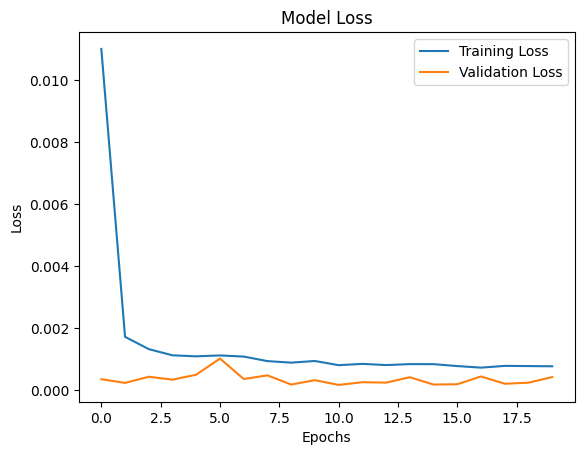

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


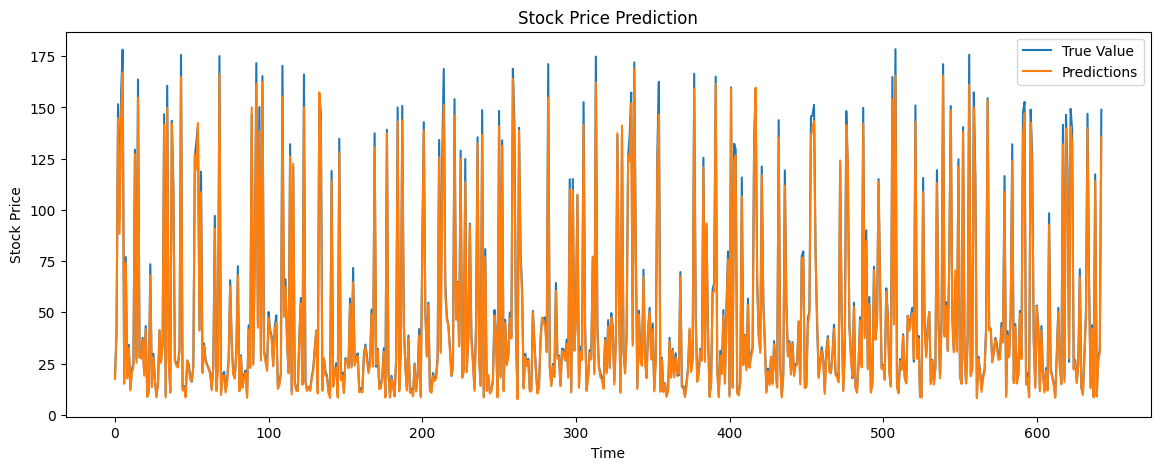

In [4]:
# Step 1: Load the Data
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Display the first few rows of the dataset
data.head()

# Step 2: Preprocess the Data
from sklearn.preprocessing import MinMaxScaler

# Select the 'Close' price as the feature
close_prices = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create sequences
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape X for LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Step 3: Create Training and Test Sets
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Step 6: Evaluate the Model
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 7: Make Predictions
# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Inverse transform the true values
true_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions and the true values
plt.figure(figsize=(14, 5))
plt.plot(true_values, label='True Value')
plt.plot(predictions, label='Predictions')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
